In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning & Preparation.


In [15]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')  # Kaggle auto-fills path
df.head()
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [17]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [18]:
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)

In [19]:
df['year_month']=df['Order Date'].dt.to_period('M')

# Trend Analysis

In [1]:
total_sales= ( df.groupby('year_month')['Sales'].sum().reset_index(name='total_sales') ) 

NameError: name 'df' is not defined

In [21]:
print(total_sales)

   year_month  total_sales
0     2015-01   14205.7070
1     2015-02    4519.8920
2     2015-03   55205.7970
3     2015-04   27906.8550
4     2015-05   23644.3030
5     2015-06   34322.9356
6     2015-07   33781.5430
7     2015-08   27117.5365
8     2015-09   81623.5268
9     2015-10   31453.3930
10    2015-11   77907.6607
11    2015-12   68167.0585
12    2016-01   18066.9576
13    2016-02   11951.4110
14    2016-03   32339.3184
15    2016-04   34154.4685
16    2016-05   29959.5305
17    2016-06   23599.3740
18    2016-07   28608.2590
19    2016-08   36818.3422
20    2016-09   63133.6060
21    2016-10   31011.7375
22    2016-11   75249.3995
23    2016-12   74543.6012
24    2017-01   18542.4910
25    2017-02   22978.8150
26    2017-03   51165.0590
27    2017-04   38679.7670
28    2017-05   56656.9080
29    2017-06   39724.4860
30    2017-07   38320.7830
31    2017-08   30542.2003
32    2017-09   69193.3909
33    2017-10   59583.0330
34    2017-11   79066.4958
35    2017-12   95739.1210
3

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


In [23]:
top_3= ( df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(3).reset_index(name='total_sales') )
top_3

,Customer ID,total_sales
0,SM-20320,25043.050
1,TC-20980,19052.218
2,RB-19360,15117.339


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [25]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True)


In [26]:
df['Postal Code'] = df['Postal Code'].astype(str)
df['Customer ID'] = df['Customer ID'].astype('category')


In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


In [28]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'year_month'],
      dtype='object')

In [29]:
total_sales=df['Sales'].sum().round()

In [30]:
total_orders=df['Order ID'].nunique()

In [31]:
total_customers=df['Customer ID'].nunique()

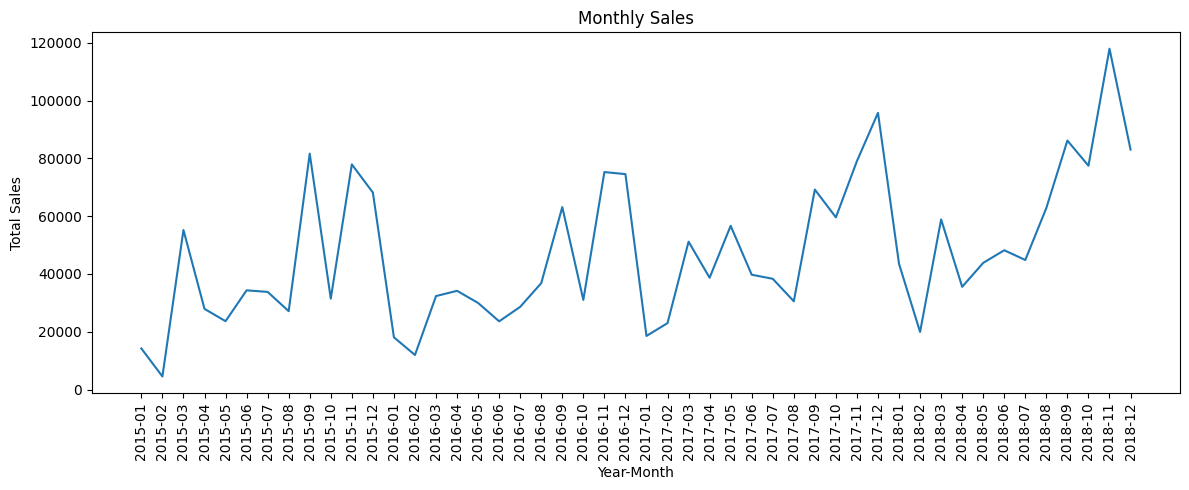

In [32]:
monthly_sales= ( df.groupby('year_month')['Sales'].sum().reset_index(name='total_sales'))
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['year_month'].astype(str),monthly_sales['total_sales'])
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'year_month'],
      dtype='object')

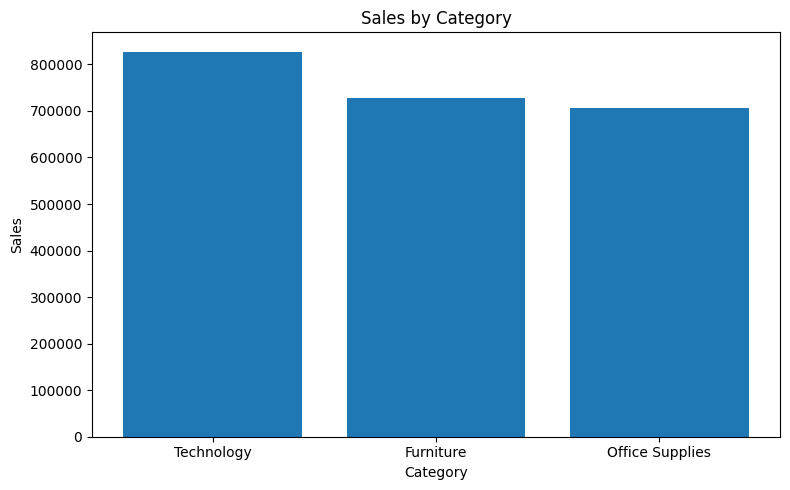

In [34]:
sales_cate= ( df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index(name='cat_sales'))

plt.figure(figsize=(8,5))
plt.bar(sales_cate['Category'],sales_cate['cat_sales'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'year_month'],
      dtype='object')

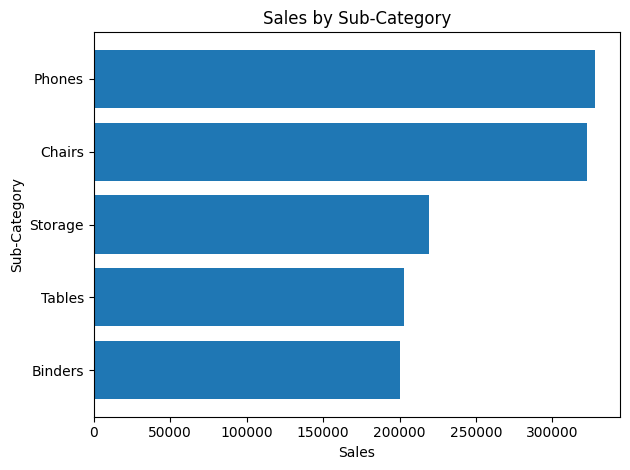

In [36]:
sub_sales= ( df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index(name='sub_sales').head())

plt.barh(sub_sales['Sub-Category'],sub_sales['sub_sales'])
plt.title('Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()            

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


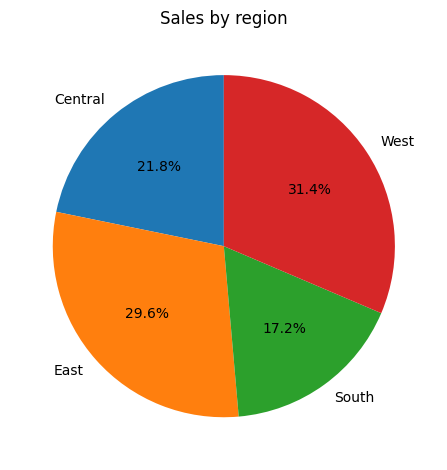

In [38]:
regional_sales= ( df.groupby('Region')['Sales'].sum().reset_index(name='region_sales'))

plt.pie(regional_sales['region_sales'],labels=regional_sales['Region'],autopct="%1.1f%%",startangle=90)
plt.title('Sales by region')
plt.tight_layout()
plt.show()

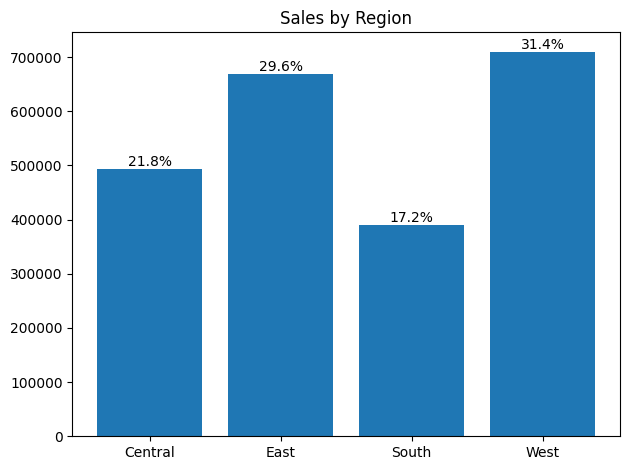

In [39]:
regional_sales['pct_sales'] = (
    regional_sales['region_sales'] / regional_sales['region_sales'].sum()
) * 100


bars=plt.bar(regional_sales['Region'],regional_sales['region_sales'])

# Add percentage labels on top of bars
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{regional_sales['pct_sales'][i]:.1f}%",
        ha='center',
        va='bottom'
    )
plt.title('Sales by Region')
plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   category      
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [41]:
print('Total sales: ',df['Sales'].sum())
print('Total Order: ',df['Order ID'].nunique())
print('Total Customers: ',df['Customer ID'].nunique())
print('Average order value: ',df.groupby('Order ID')['Sales'].sum().mean().round())

Total sales:  2261536.7827000003
Total Order:  4922
Total Customers:  793
Average order value:  459.0


In [42]:
df[df['Order ID'] == df['Order ID'].iloc[0]]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11


In [43]:
monthly_summary= ( df.groupby('year_month').agg(

    monthly_sales=('Sales','sum'),
    monthly_order=('Order ID','nunique'),
    monthly_cust=('Customer ID','nunique')
    
))
monthly_summary=monthly_summary.reset_index()
monthly_summary

,year_month,monthly_sales,monthly_order,monthly_cust
0,2015-01,14205.7070,30,30
1,2015-02,4519.8920,28,27
2,2015-03,55205.7970,69,67
3,2015-04,27906.8550,63,61
4,2015-05,23644.3030,68,66
5,2015-06,34322.9356,64,61
6,2015-07,33781.5430,64,64
7,2015-08,27117.5365,70,68
8,2015-09,81623.5268,129,117
9,2015-10,31453.3930,78,75


In [44]:
monthly_summary['sales_growth_pct']= ( (monthly_summary['monthly_sales']-monthly_summary['monthly_sales'].shift(1))/monthly_summary['monthly_sales'].shift(1))*100

In [45]:
monthly_summary

,year_month,monthly_sales,monthly_order,monthly_cust,sales_growth_pct
0,2015-01,14205.7070,30,30,NaN
1,2015-02,4519.8920,28,27,-68.182562
2,2015-03,55205.7970,69,67,1121.396374
3,2015-04,27906.8550,63,61,-49.449412
4,2015-05,23644.3030,68,66,-15.274211
5,2015-06,34322.9356,64,61,45.163660
6,2015-07,33781.5430,64,64,-1.577349
7,2015-08,27117.5365,70,68,-19.726768
8,2015-09,81623.5268,129,117,200.999048
9,2015-10,31453.3930,78,75,-61.465286


In [46]:
monthly_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   year_month        48 non-null     period[M]
 1   monthly_sales     48 non-null     float64  
 2   monthly_order     48 non-null     int64    
 3   monthly_cust      48 non-null     int64    
 4   sales_growth_pct  47 non-null     float64  
dtypes: float64(2), int64(2), period[M](1)
memory usage: 2.0 KB


In [47]:

monthly_summary['month']= monthly_summary['year_month'].dt.month

seasonality_df= ( monthly_summary.groupby('month')['monthly_sales'].mean().round(2).reset_index(name='avg_monthly_sales'))

seasonality_df
                                                                                               

,month,avg_monthly_sales
0,1,23572.91
1,2,14842.78
2,3,49393.40
3,4,34070.75
4,5,38521.68
5,6,36459.38
6,7,36383.92
7,8,39328.98
8,9,75025.85
9,10,49874.07


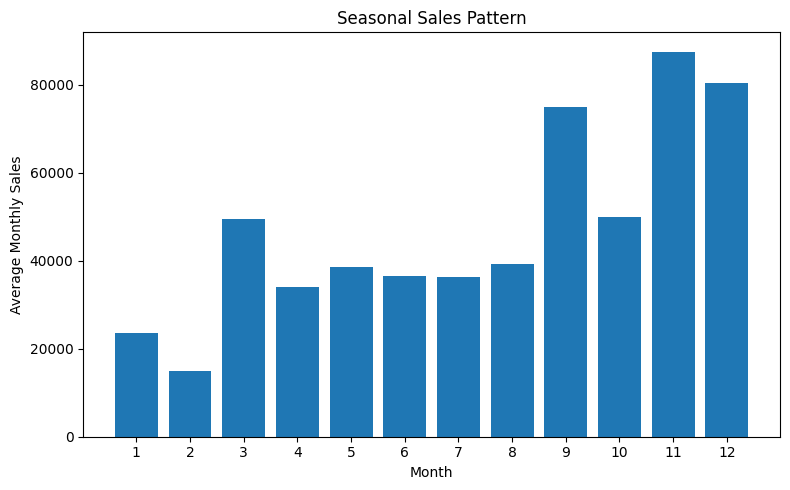

In [48]:


plt.figure(figsize=(8,5))
plt.bar(seasonality_df['month'], seasonality_df['avg_monthly_sales'])

plt.xlabel('Month')
plt.ylabel('Average Monthly Sales')
plt.title('Seasonal Sales Pattern')

plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


In [49]:
cust_contri= ( df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False))
cust_contri=cust_contri.reset_index(name='total_sales')

cust_contri['pct_contribution']=cust_contri['total_sales']*100/cust_contri['total_sales'].sum()
cust_contri['cumulative_pct']=cust_contri['pct_contribution'].cumsum()
cust_contri

top_80= cust_contri[cust_contri['cumulative_pct']<=80]
top_80

/tmp/ipykernel_55/2727036225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_contri= ( df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False))


,Customer ID,total_sales,pct_contribution,cumulative_pct
0,SM-20320,25043.050,1.107347,1.107347
1,TC-20980,19052.218,0.842446,1.949792
2,RB-19360,15117.339,0.668454,2.618246
3,TA-21385,14595.620,0.645385,3.263632
4,AB-10105,14473.571,0.639988,3.903620
...,...,...,...,...
387,TS-21505,2243.274,0.099192,79.543444
388,JG-15310,2240.580,0.099073,79.642517
389,JF-15190,2239.606,0.099030,79.741547
390,LW-16825,2238.061,0.098962,79.840509


In [50]:
num_top_customers = top_80.shape[0]
total_customers = cust_contri.shape[0]

percentage_of_customers = (num_top_customers / total_customers) * 100

num_top_customers, percentage_of_customers


(392, 49.43253467843632)

In [51]:
segment_contribution= ( df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index(name='total_sales'))

segment_contribution['sales_pct']=segment_contribution['total_sales']*100/segment_contribution['total_sales'].sum().round(2)
segment_contribution

,Segment,total_sales,sales_pct
0,Consumer,1.148061e+06,50.764619
1,Corporate,6.884941e+05,30.443638
2,Home Office,4.249822e+05,18.791743


In [52]:
df.head()

segment_summary= ( df.groupby('Segment').agg(

    total_sales=('Sales','sum'),
    total_order=('Order ID','nunique')
))

segment_summary['avg_order_value']=segment_summary['total_sales']/segment_summary['total_order']
segment_summary['total_sales'] = segment_summary['total_sales'].map(lambda x: f"{x:,.2f}")
segment_summary


,total_sales,total_order,avg_order_value
Segment,,,
Consumer,"1,148,060.53",2537,452.526816
Corporate,"688,494.07",1491,461.766650
Home Office,"424,982.18",894,475.371563


In [53]:
# 1) Monthly sales by Category
category_analysis = (
    df.groupby(['year_month', 'Category'])['Sales']
      .sum()
      .reset_index(name='monthly_sales')
)

# 2) Sort before growth calculations (important)
category_analysis = category_analysis.sort_values(['Category', 'year_month'])

# 3) MoM growth % within each Category (optional but useful)
category_analysis['growth_pct'] = (
    category_analysis.groupby('Category')['monthly_sales']
                    .pct_change() * 100
)

category_analysis


,year_month,Category,monthly_sales,growth_pct
0,2015-01,Furniture,6217.277,NaN
3,2015-02,Furniture,1839.658,-70.410551
6,2015-03,Furniture,14243.368,674.239995
9,2015-04,Furniture,7944.837,-44.220798
12,2015-05,Furniture,6912.787,-12.990197
...,...,...,...,...
131,2018-08,Technology,17619.162,-24.087815
134,2018-09,Technology,26028.659,47.729268
137,2018-10,Technology,32855.663,26.228796
140,2018-11,Technology,49409.103,50.382304


In [54]:
yearly_category= ( category_analysis.assign(year=category_analysis['year_month'].dt.year)
                 .groupby(['year','Category'])['monthly_sales'].sum().reset_index(name='yearly_sales'))

yearly_category

,year,Category,yearly_sales
0,2015,Furniture,156477.8811
1,2015,Office Supplies,149512.8200
2,2015,Technology,173865.5070
3,2016,Furniture,164053.8674
4,2016,Office Supplies,133124.4070
5,2016,Technology,162257.7310
6,2017,Furniture,195813.0400
7,2017,Office Supplies,182417.5660
8,2017,Technology,221961.9440
9,2018,Furniture,212313.7872


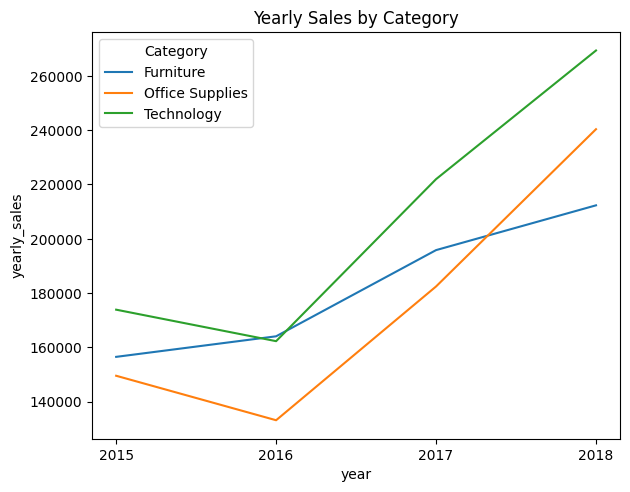

In [55]:
tmp=yearly_category.copy()
tmp['year']=tmp['year'].astype(str)

sns.lineplot(data=tmp,x='year',y='yearly_sales',hue='Category')
plt.tight_layout()
plt.title('Yearly Sales by Category')
plt.show()

In [56]:
tmp.groupby('Category')['yearly_sales'].sum().round(2)

Category
Furniture          728658.58
Office Supplies    705422.33
Technology         827455.87
Name: yearly_sales, dtype: float64

In [57]:
# CAGR

cagr_list=[]

for category in yearly_category['Category'].unique():

    data= yearly_category[yearly_category['Category']==category].sort_values('year')

    first_year= data['yearly_sales'].iloc[0]
    last_year=  data['yearly_sales'].iloc[-1]

    n_year= data['year'].nunique()-1

    cagr= (last_year/first_year)**(1/n_year) - 1

    cagr_list.append([category,cagr*100])

cagr_df=pd.DataFrame(cagr_list,columns=['Category','CAGR%'])

cagr_df

,Category,CAGR%
0,Furniture,10.706999
1,Office Supplies,17.147348
2,Technology,15.712152


In [58]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


In [59]:
total_sales=df.groupby('Category')['Sales'].sum().round(2).reset_index(name='cat_sale')
total_sales

,Category,cat_sale
0,Furniture,728658.58
1,Office Supplies,705422.33
2,Technology,827455.87


In [60]:
segment_contri=( df.groupby(['Segment','Category'])['Sales'].sum().round(2).reset_index(name='seg_sale'))
segment_contri

,Segment,Category,seg_sale
0,Consumer,Furniture,387696.26
1,Consumer,Office Supplies,359352.61
2,Consumer,Technology,401011.66
3,Corporate,Furniture,220321.70
4,Corporate,Office Supplies,224130.54
5,Corporate,Technology,244041.84
6,Home Office,Furniture,120640.62
7,Home Office,Office Supplies,121939.19
8,Home Office,Technology,182402.37


In [61]:
segment_contri['total_sales']= ( segment_contri.groupby('Category')['seg_sale']
                                .transform('sum'))
                               

segment_contri['pct_share']= ( segment_contri['seg_sale']/segment_contri['total_sales'])*100

segment_contri

,Segment,Category,seg_sale,total_sales,pct_share
0,Consumer,Furniture,387696.26,728658.58,53.206848
1,Consumer,Office Supplies,359352.61,705422.34,50.941484
2,Consumer,Technology,401011.66,827455.87,48.463208
3,Corporate,Furniture,220321.70,728658.58,30.236616
4,Corporate,Office Supplies,224130.54,705422.34,31.772532
5,Corporate,Technology,244041.84,827455.87,29.493034
6,Home Office,Furniture,120640.62,728658.58,16.556536
7,Home Office,Office Supplies,121939.19,705422.34,17.285984
8,Home Office,Technology,182402.37,827455.87,22.043758
